In [1]:
## Load required packages for CNN modeling
%pylab inline --no-import-all
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical ## to transform data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## TBD: Same with the MLP from sklearn possible - should we evaluate this as well

Populating the interactive namespace from numpy and matplotlib


C:\Users\meret\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [4]:
## Check shape of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
## print one instance
print(img[1,:])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   4   4   2   2   2   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   4   5   9  32  32  21  21  20   9   4
   2   0   0   0   0   0   0   0   0   0   0   0   0   0   3  21  34  82
 125 129 140 203 203 174 172 170 140 125  63  18   0   0   0   0   0   0
   0   0   0   1  20  34  84 170 204 233 249 250 250 254 254 252 252 252
 250 237 111  32   0   0   0   0   0   0   0   0   0   8  77 115 172 232
 245 252 254 254 254 254 254 254 254 253 247 206  76  20   0   0   0   0
   0   0   0   0   7  90 218 243 252 254 254 254 254 254 255 255 254 254
 247 207 159  47   7   1   0   0   0   0   0   0   0   3  22 159 245 253
 254 254 252 251 254 254 254 254 254 253 221 127  7

In [5]:
## print one instance (label)
print(lbl[0])

23


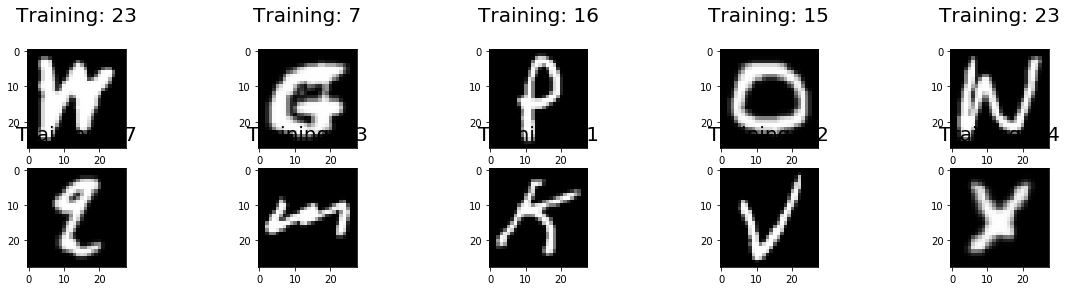

In [6]:
## Display example digits
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(img[0:10], lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

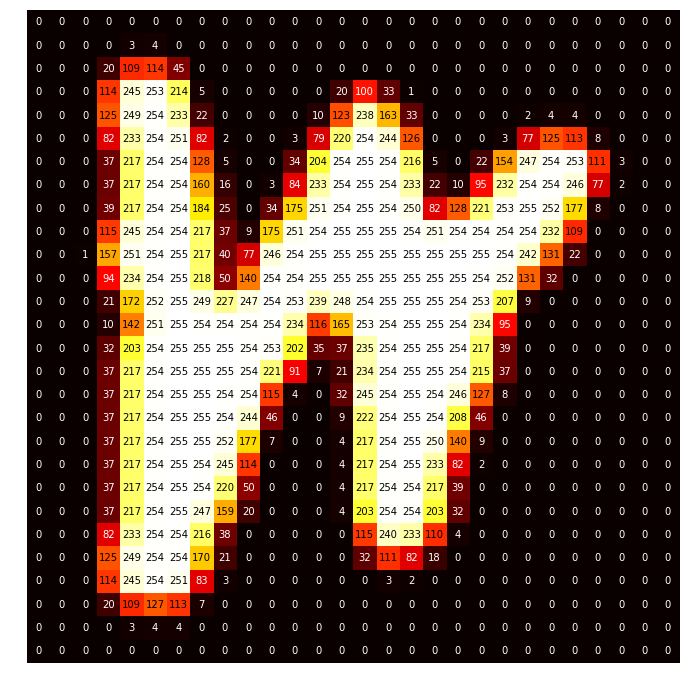

In [7]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

visualize_input(img[0,:].reshape(28,28), ax)

#plt.title(img[3,0])
plt.axis("off")
plt.show()


## source: https://www.kaggle.com/darkside92/simple-best-digit-recognizer-with-cnn-top-5/comments#497794

In [8]:
## Split into train and test sets (80 vs 20%)
## TBD: How about cross-validation?, 
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [10]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [11]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
## Encode categorical label data
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
X = x_train
Y_test = lb.fit_transform(y_test)
X_test = x_test

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [27]:
## Define the model
## TBD: Conv2d - https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e
## TBD: More layers?
model = Sequential()
# Add two hidden layers, use the relu activation.
model.add(Dense(128, input_dim=784, activation='relu')) # activation could also be "tanh"
model.add(Dense(64, activation='relu'))
# The final layer is the output layer with an inverse logit activation function.
model.add(Dense(26, activation='softmax'))
# Use the Adam optimizer. Adam works similar to regular SGD, 
# but with some important improvements: https://arxiv.org/abs/1412.6980
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"]) #for multiclass classification

In [25]:
model = model.fit(X,Y, epochs = 20)#, batch_size=64)
##TBD: Add cross validation https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e

Epoch 1/20
99840/99840 [==============================] - 14s 139us/step - loss: 0.7518 - accuracy: 0.7755
Epoch 2/20
99840/99840 [==============================] - 13s 134us/step - loss: 0.4200 - accuracy: 0.8685
Epoch 3/20
99840/99840 [==============================] - 14s 137us/step - loss: 0.3486 - accuracy: 0.8879
Epoch 4/20
99840/99840 [==============================] - 14s 141us/step - loss: 0.3087 - accuracy: 0.9000
Epoch 5/20
99840/99840 [==============================] - 14s 136us/step - loss: 0.2810 - accuracy: 0.9080
Epoch 6/20
99840/99840 [==============================] - 14s 136us/step - loss: 0.2600 - accuracy: 0.9136
Epoch 7/20
99840/99840 [==============================] - 14s 135us/step - loss: 0.2417 - accuracy: 0.9181
Epoch 8/20
99840/99840 [==============================] - 14s 136us/step - loss: 0.2274 - accuracy: 0.9225
Epoch 9/20
99840/99840 [==============================] - 14s 143us/step - loss: 0.2177 - accuracy: 0.9249
Epoch 10/20
99840/99840 [============

In [28]:
# training the model and saving metrics in history
results = model.fit(X, Y,
          batch_size=32, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

model.summary()

Train on 99840 samples, validate on 24960 samples
Epoch 1/20
 - 16s - loss: 0.7577 - accuracy: 0.7755 - val_loss: 0.4884 - val_accuracy: 0.8491
Epoch 2/20
 - 17s - loss: 0.4155 - accuracy: 0.8699 - val_loss: 0.4116 - val_accuracy: 0.8706
Epoch 3/20
 - 16s - loss: 0.3431 - accuracy: 0.8904 - val_loss: 0.3737 - val_accuracy: 0.8795
Epoch 4/20
 - 16s - loss: 0.3036 - accuracy: 0.9017 - val_loss: 0.3604 - val_accuracy: 0.8850
Epoch 5/20
 - 16s - loss: 0.2775 - accuracy: 0.9082 - val_loss: 0.3473 - val_accuracy: 0.8917
Epoch 6/20
 - 16s - loss: 0.2534 - accuracy: 0.9154 - val_loss: 0.3530 - val_accuracy: 0.8906
Epoch 7/20
 - 16s - loss: 0.2405 - accuracy: 0.9195 - val_loss: 0.3544 - val_accuracy: 0.8912
Epoch 8/20
 - 16s - loss: 0.2248 - accuracy: 0.9236 - val_loss: 0.3678 - val_accuracy: 0.8904
Epoch 9/20
 - 16s - loss: 0.2129 - accuracy: 0.9260 - val_loss: 0.3558 - val_accuracy: 0.8955
Epoch 10/20
 - 16s - loss: 0.2016 - accuracy: 0.9293 - val_loss: 0.3634 - val_accuracy: 0.8928
Epoch 11/

In [29]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4197868920970135
Test accuracy: 0.8949118852615356


In [30]:
settings = []

for a in ['tanh', 'relu']:
    for o in ['adam']:
        model = Sequential()
        model.add(Dense(256, input_dim=784, activation=a))
        model.add(Dense(128, activation=a))
        model.add(Dense(26, activation='softmax'))
        model.compile(optimizer=o, loss='categorical_crossentropy', metrics = ["accuracy"]) 
        model.fit(X, Y, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, Y_test))
        score = model.evaluate(X_test, Y_test, verbose=0)
        settings.append((a, o, score[0], score[1]))
        print(settings[-1])

best_loss = min(settings, key=lambda x: x[-2])
best_accuracy =  max(settings, key=lambda x: x[-1])
print("Best settings according to loss {}".format(best_loss))
print("Best settings according to accuracy {}".format(best_accuracy))

Train on 99840 samples, validate on 24960 samples
Epoch 1/5
 - 23s - loss: 0.7213 - accuracy: 0.7869 - val_loss: 0.4688 - val_accuracy: 0.8526
Epoch 2/5
 - 22s - loss: 0.3843 - accuracy: 0.8787 - val_loss: 0.3903 - val_accuracy: 0.8761
Epoch 3/5
 - 22s - loss: 0.3101 - accuracy: 0.8993 - val_loss: 0.3450 - val_accuracy: 0.8887
Epoch 4/5
 - 22s - loss: 0.2648 - accuracy: 0.9132 - val_loss: 0.3308 - val_accuracy: 0.8931
Epoch 5/5
 - 23s - loss: 0.2360 - accuracy: 0.9210 - val_loss: 0.3453 - val_accuracy: 0.8913
('tanh', 'adam', 0.3452760880263761, 0.8912660479545593)
Train on 99840 samples, validate on 24960 samples
Epoch 1/5
 - 24s - loss: 0.6449 - accuracy: 0.8033 - val_loss: 0.4081 - val_accuracy: 0.8702
Epoch 2/5
 - 22s - loss: 0.3510 - accuracy: 0.8877 - val_loss: 0.3633 - val_accuracy: 0.8855
Epoch 3/5
 - 22s - loss: 0.2836 - accuracy: 0.9063 - val_loss: 0.3290 - val_accuracy: 0.8953
Epoch 4/5
 - 22s - loss: 0.2453 - accuracy: 0.9173 - val_loss: 0.3259 - val_accuracy: 0.8964
Epoch 

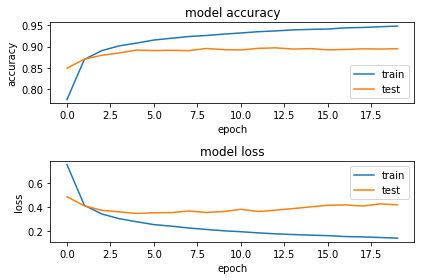

In [31]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [32]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Train Loss 0.18212485645646945
Train Accuracy 0.934965968132019

Test Loss 0.3274253067202293
Test Accuracy 0.8981170058250427


In [48]:
#model.predict_classes(X_test)

In [47]:
#model.predict(X_test)

In [ ]:
## Logistic Regression
## Source: https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh

In [50]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [26]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [27]:
from sklearn.model_selection import train_test_split
## Split into train and test sets (80 vs 20%)
## TBD: How about cross-validation?,
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [28]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(99840, 784)
(24960, 784)
(99840,)
(24960,)


In [51]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([25], dtype=uint8)

In [53]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[25 22 14 ...  4 22  5]


In [54]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(logisticRegr.predict(x_test), y_test)
print(acc)
#print("Accuracy: {:.3}".format(acc))

## Pretty low accuracy - other algo such as SGD?

0.703125


In [55]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

In [56]:
cm = metrics.confusion_matrix(y_test, predictions)

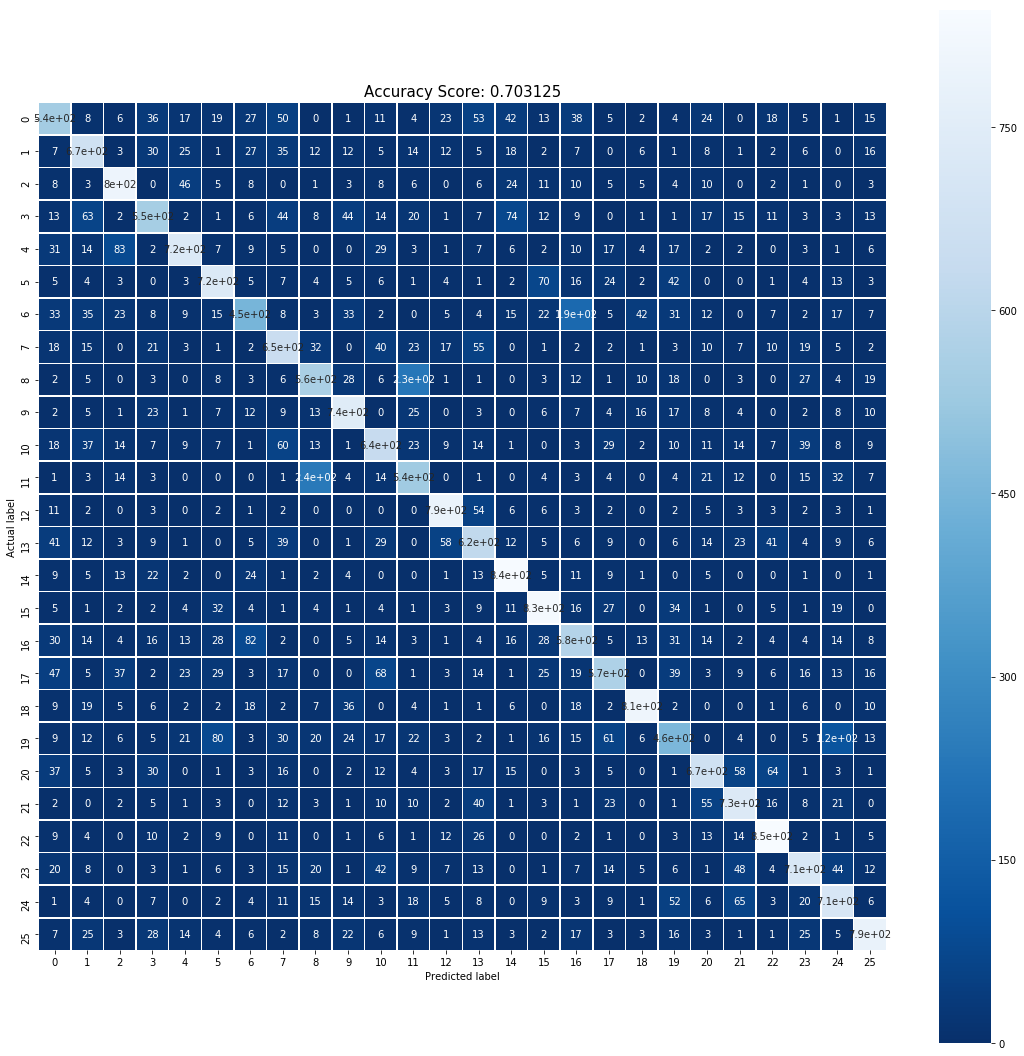

In [57]:
plt.figure(figsize=(19,19))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

In [ ]:
## Image can be changed

In [7]:
## Task 2
## Load data
testdata = np.load('test-dataset.npy')
 #   img2 = data["x"] ## test dataset
  #  lbl2 = data["y"]

In [10]:
print(testdata.shape)
print(type(testdata))

(10000, 30, 168)
<class 'numpy.ndarray'>


In [15]:
print(testdata[0,0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  62.   0. 110. 255.   0.   0. 255. 198.   0.   0.   0.
 231.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 230. 249.   0.   0.   0.   0.   0. 118.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 182.   0.   0. 130. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0.  31.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0. 225.   0.   0.   0.   0.   0.   0.   0.]


In [16]:
print(testdata[0,0].shape)

(168,)
